In [2]:
import os
from pprint import pformat

import joblib
import optuna
import plotly
from matplotlib import pyplot as plt

In [3]:
def study_info(study):
   print("Best accuracy:", study.best_value)
   print("Best hyperparameters:")
   print(pformat(study.best_trial.params))
   print()
   print("Hyperparameter importances:")
   print(pformat(optuna.importance.get_param_importances(study)))

## Sim2Real initial

In [11]:
study = joblib.load(os.path.join("RAW", "optuna_studies", "optimize_sim2real_h_opt_04-02_21-35-29.pkl"))

best_trials = optuna.create_study()
for trial in sorted(study.trials, key=lambda t: t.value, reverse=True)[:8]:
    best_trials.add_trial(trial)
    
study_info(study)

[I 2023-04-11 16:44:18,670] A new study created in memory with name: no-name-18d9f9a6-d8c8-450d-a2c1-e7acab72f312


Best accuracy: 1.0
Best hyperparameters:
{'cl_dropout': 0.2,
 'fc_dropout': 0.1,
 'learning_rate': 0.000164741672748917,
 'momentum': 0.9461008361396384,
 'sch_gamma': 0.9988912264828637,
 'weight_decay': 2.9132587673736556e-05}

Hyperparameter importances:
OrderedDict([('sch_gamma', 0.871211826520637),
             ('fc_dropout', 0.08399739434160454),
             ('momentum', 0.018516445770852024),
             ('cl_dropout', 0.01812189582423466),
             ('learning_rate', 0.007802812293609581),
             ('weight_decay', 0.00034962524906219096)])


C:\Users\allu\AppData\Local\Temp\ipykernel_37020\1455980257.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

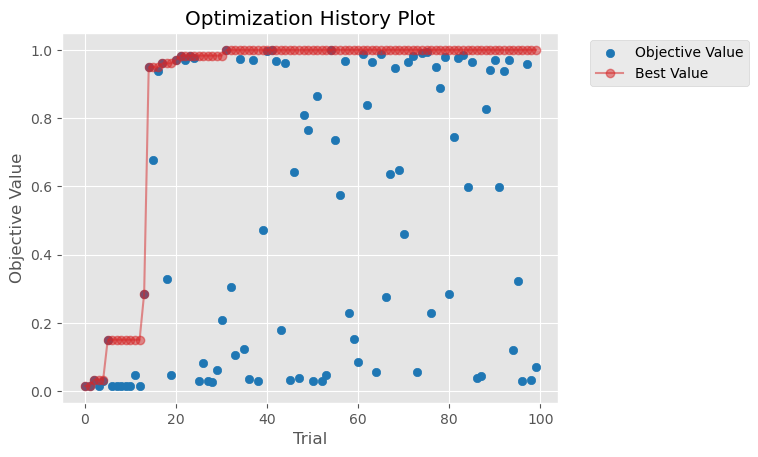

In [4]:
optuna.visualization.matplotlib.plot_optimization_history(study)

In [8]:
optuna.visualization.plot_slice(study)

In [7]:
optuna.visualization.plot_slice(best_trials)